<h1 style="text-align:center">Vibration Absorbers<br><span style="font-size: 0.75em;">(without damping)</span></h1>

<h3 style="text-align:center"> MCHE 485: Mechanical Vibrations</h3> 
<p style="text-align:center">Dr. Joshua Vaughan <br>
<a href="mailto:joshua.vaughan@louisiana.edu">joshua.vaughan@louisiana.edu</a><br>
http://www.ucs.louisiana.edu/~jev9637/   </p>

<p style = "text-align: center;">
	<img src="http://shared.crawlab.org/Vibration_Absorber_Horizontal.png" alt=" An Undamped Vibration Absorber System" width=60%><br>
    <strong> Figure 1: An Undamped Vibration Absorber System</strong>
</p><br>

This notebook demonstrates the analysis of a vibration absorber system like the one shown in Figure 1. The $m_2$ subsystem has been added to the system with hopes of limiting the vibration of $m_1$. For this system, to limit the vibration of $m_1$, the second mass, $m_2$, and second spring, $k_2$, must be chosen such that:

$ \quad \frac{k_2}{m_2} = \frac{k_1}{m_2} $

Let's analyze the responses of $m_1$ and $m_2$ when this condition holds. The equations of motion for the system are:

$ \quad m_1 \ddot{x}_1 + (k_1+k_2)x_1 - k_2 x_2 = f $

$ \quad m_2 \ddot{x}_2 -k_2 x_1 + k_2x_2 = 0 $

We could also write this equation in matrix form:

$ \quad \begin{bmatrix}m_1 & 0 \\ 0 & m_2\end{bmatrix}\begin{bmatrix}\ddot{x}_1 \\ \ddot{x}_2\end{bmatrix} + \begin{bmatrix}k_1 + k_2 & -k_2 \\ -k_2 & \hphantom{-}k_2\end{bmatrix}\begin{bmatrix}x_1 \\ x_2\end{bmatrix} = \begin{bmatrix}f \\ 0\end{bmatrix}$

Define

$ \quad M = \begin{bmatrix}m_1 & 0 \\ 0 & m_2\end{bmatrix} $

and 

$ \quad K = \begin{bmatrix}k_1 + k_2 & -k_2 \\ -k_2 & \hphantom{-}k_2\end{bmatrix} $.

Using $M$ and $K$, we want to solve:

$ \quad \left[K - \omega^2 M\right]\bar{X} = \bar{F} $ 

for $\bar{X}$. To do so, we need to take the inverse of $\left[K - \omega^2 M\right]$.

$ \quad \bar{X} = \left[K - \omega^2 M\right]^{-1}\bar{F} $ 

For information on how to obtain these equations, you can see the lectures at the [class website](http://www.ucs.louisiana.edu/~jev9637/MCHE485.html).

We'll use the numpy tools to solve this problem and examine the response of this vibration absorber system.

In [1]:
import numpy as np

# We'll use the scipy version of the linear algebra
from scipy import linalg

# Import the ODE solver for our time response analysis
from scipy.integrate import odeint  

In [2]:
# We want our plots to be displayed inline, not in a separate window
%matplotlib inline 

# Import the plotting functions  
import matplotlib.pyplot as plt

In [3]:
# Define the matrices - We'll use the values from the book example
m1 = 100.0
m2 = 10.0

k1 = 900.0 
k2 = 90.0

M = np.array([[m1, 0],
                [0,  m2]])

K = np.array([[k1 + k2, -k2],
                [-k2,      k2]])

In [4]:
F1 = 1.0
F2 = 0.0

F = [F1, F2]

w = np.linspace(0,6,1200)
X = np.zeros((len(w),2))

# This is (K-w^2 M)^-1 * (w^2*F)
for ii, freq in enumerate(w):
    X[ii,:] = np.dot(linalg.inv(K - freq**2 * M), F)

# Let's mask the discontinuity, so it isn't plotted
pos = np.where(np.abs(X[:,0]) >= 0.25)
X[pos,:] = np.nan
w[pos] = np.nan

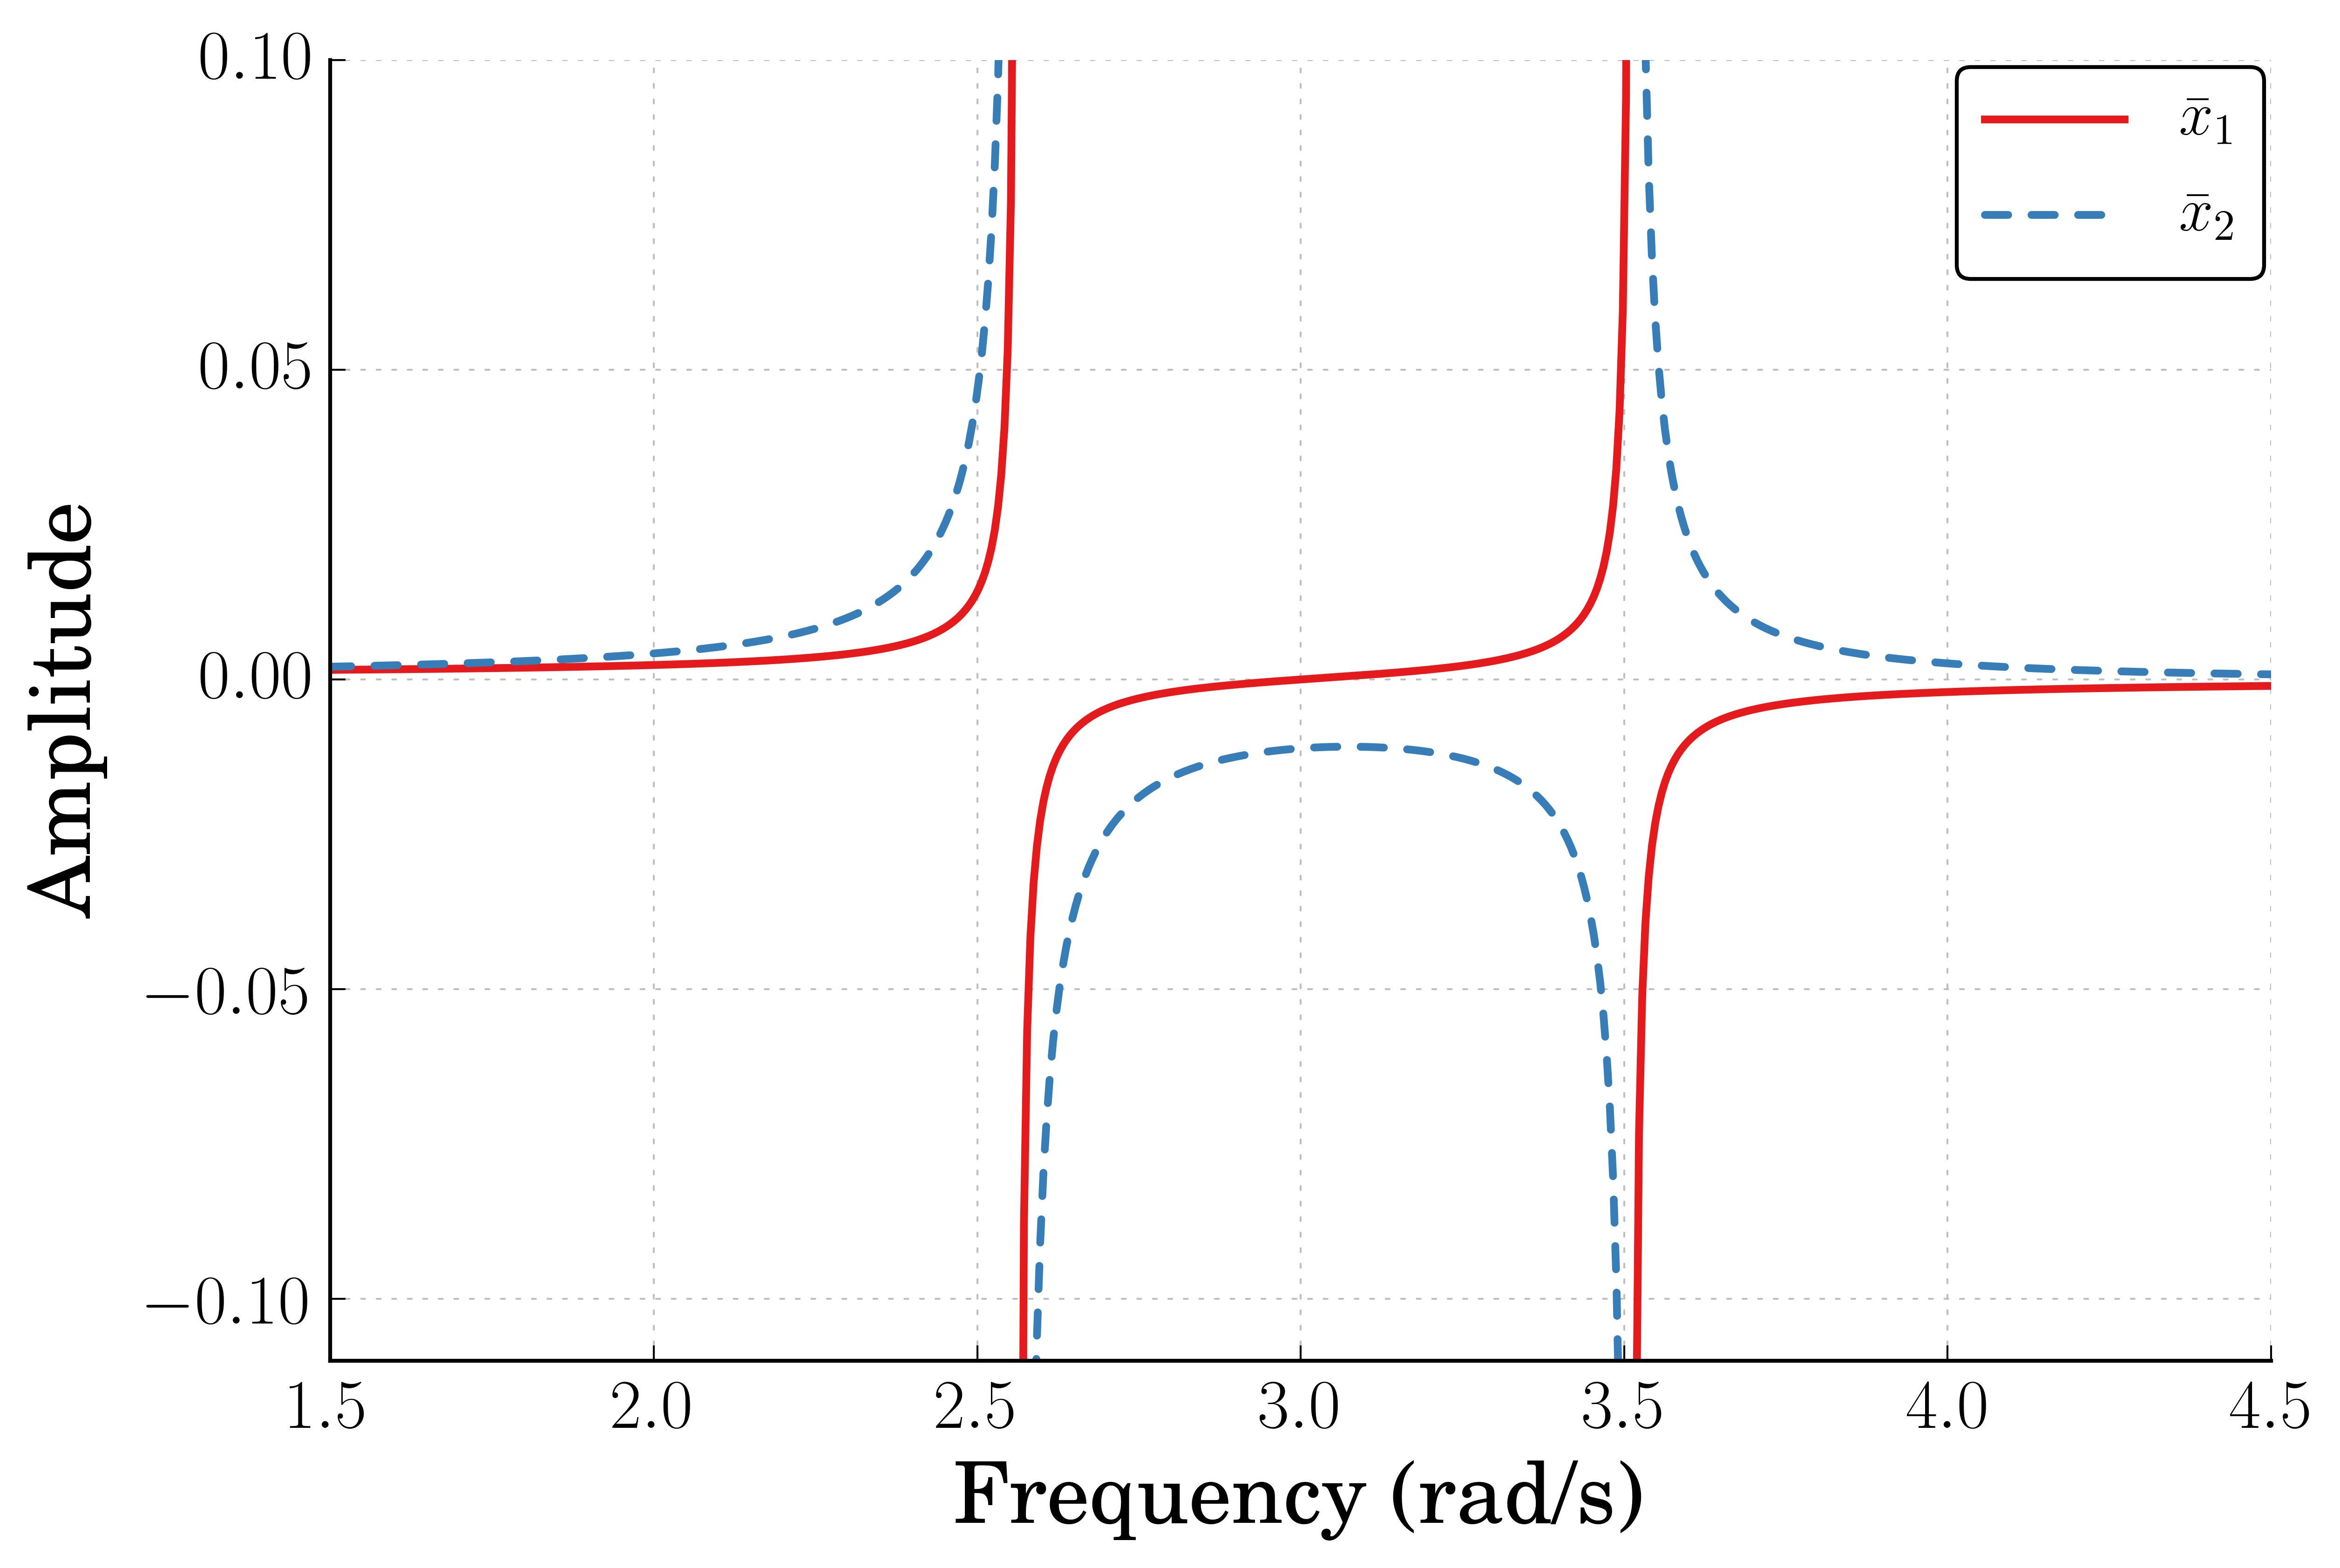

In [5]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

# Change the axis units to CMU Serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Frequency (rad/s)',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel('Amplitude',family='serif',fontsize=22,weight='bold',labelpad=10)

plt.plot(w,X[:,0],linewidth=2,label=r'$\bar{x}_1$')
plt.plot(w,X[:,1],linewidth=2,linestyle="--",label=r'$\bar{x}_2$')

# uncomment below and set limits if needed
plt.xlim(1.5,4.5)
plt.ylim(-0.11,0.10)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='serif',fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# plt.savefig('Vibration_Absorber.pdf')

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

We could also plot the magnitude of the response

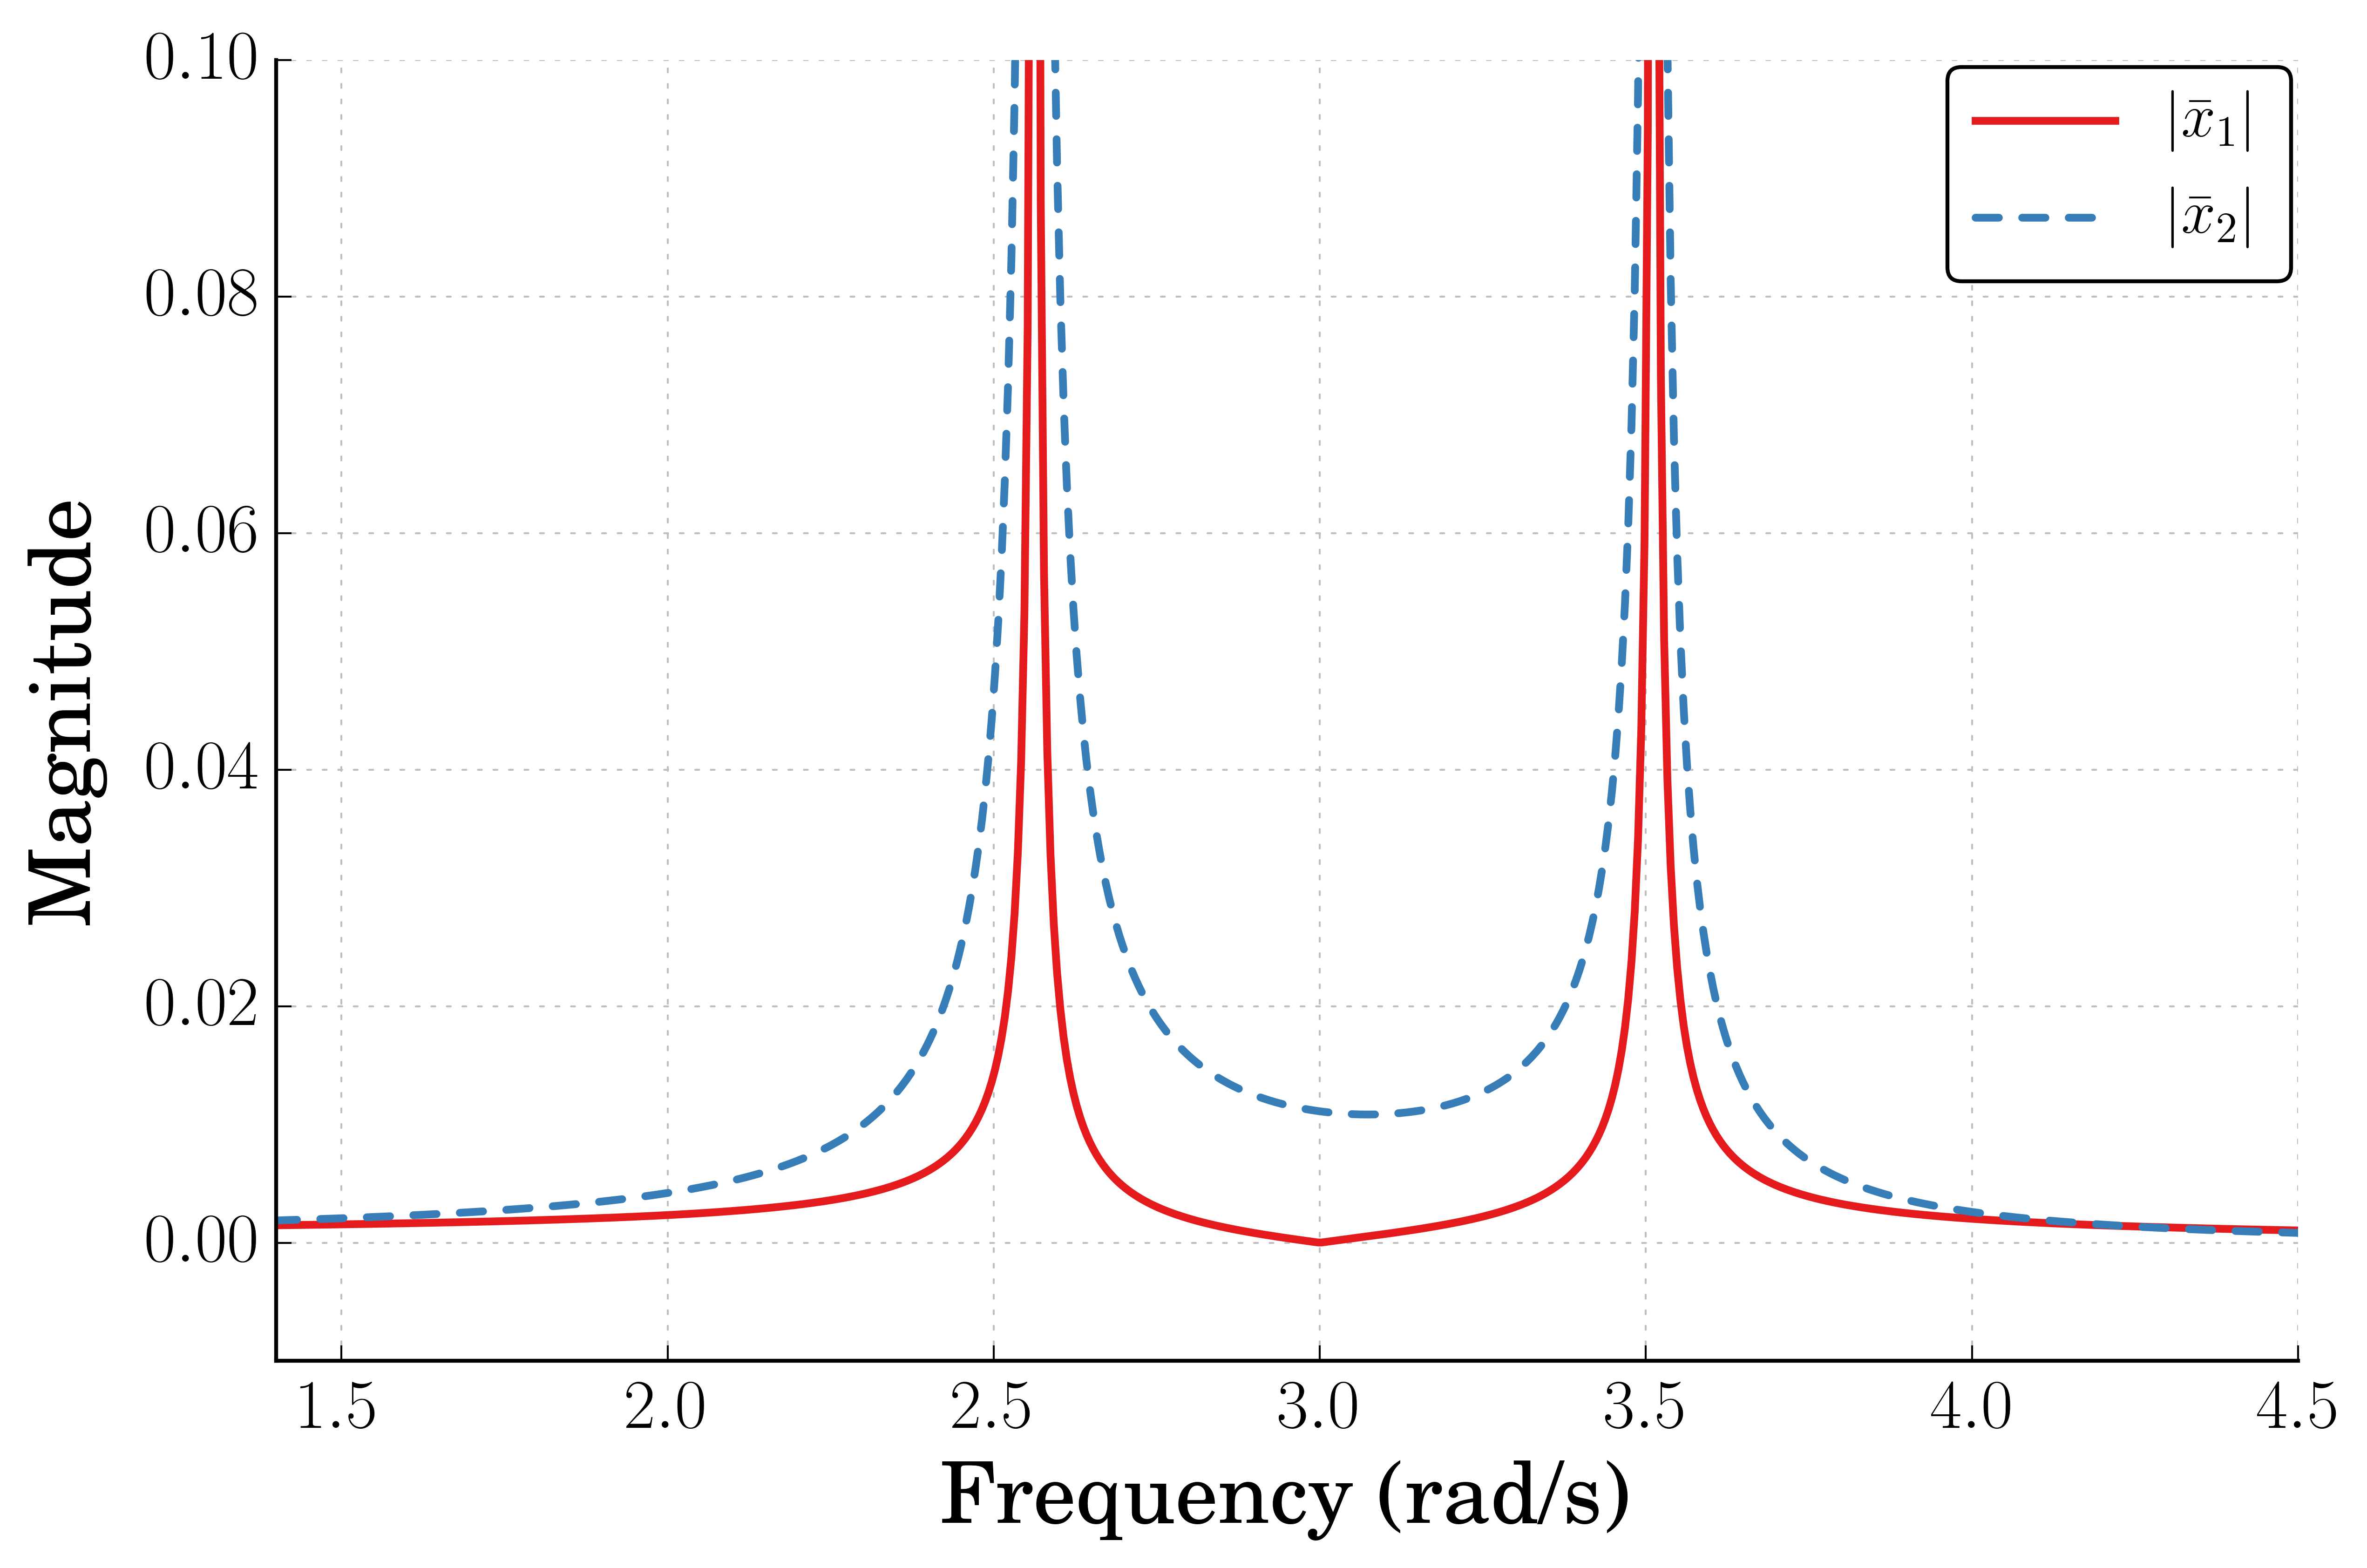

In [6]:
# Plot the magnitude of the response

# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

# Change the axis units to CMU Serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Frequency (rad/s)',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel('Magnitude',family='serif',fontsize=22,weight='bold',labelpad=10)

plt.plot(w,np.abs(X[:,0]),linewidth=2,label=r'$|\bar{x}_1|$')
plt.plot(w,np.abs(X[:,1]),linewidth=2,linestyle="--",label=r'$|\bar{x}_2|$')

# uncomment below and set limits if needed
plt.xlim(1.4,4.5)
plt.ylim(-0.01,0.1)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='serif',fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# plt.savefig('Vibration_Absorber_Magnitude.pdf')

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

### Now, let's look at using a smaller $m_2$ and $k_2$.

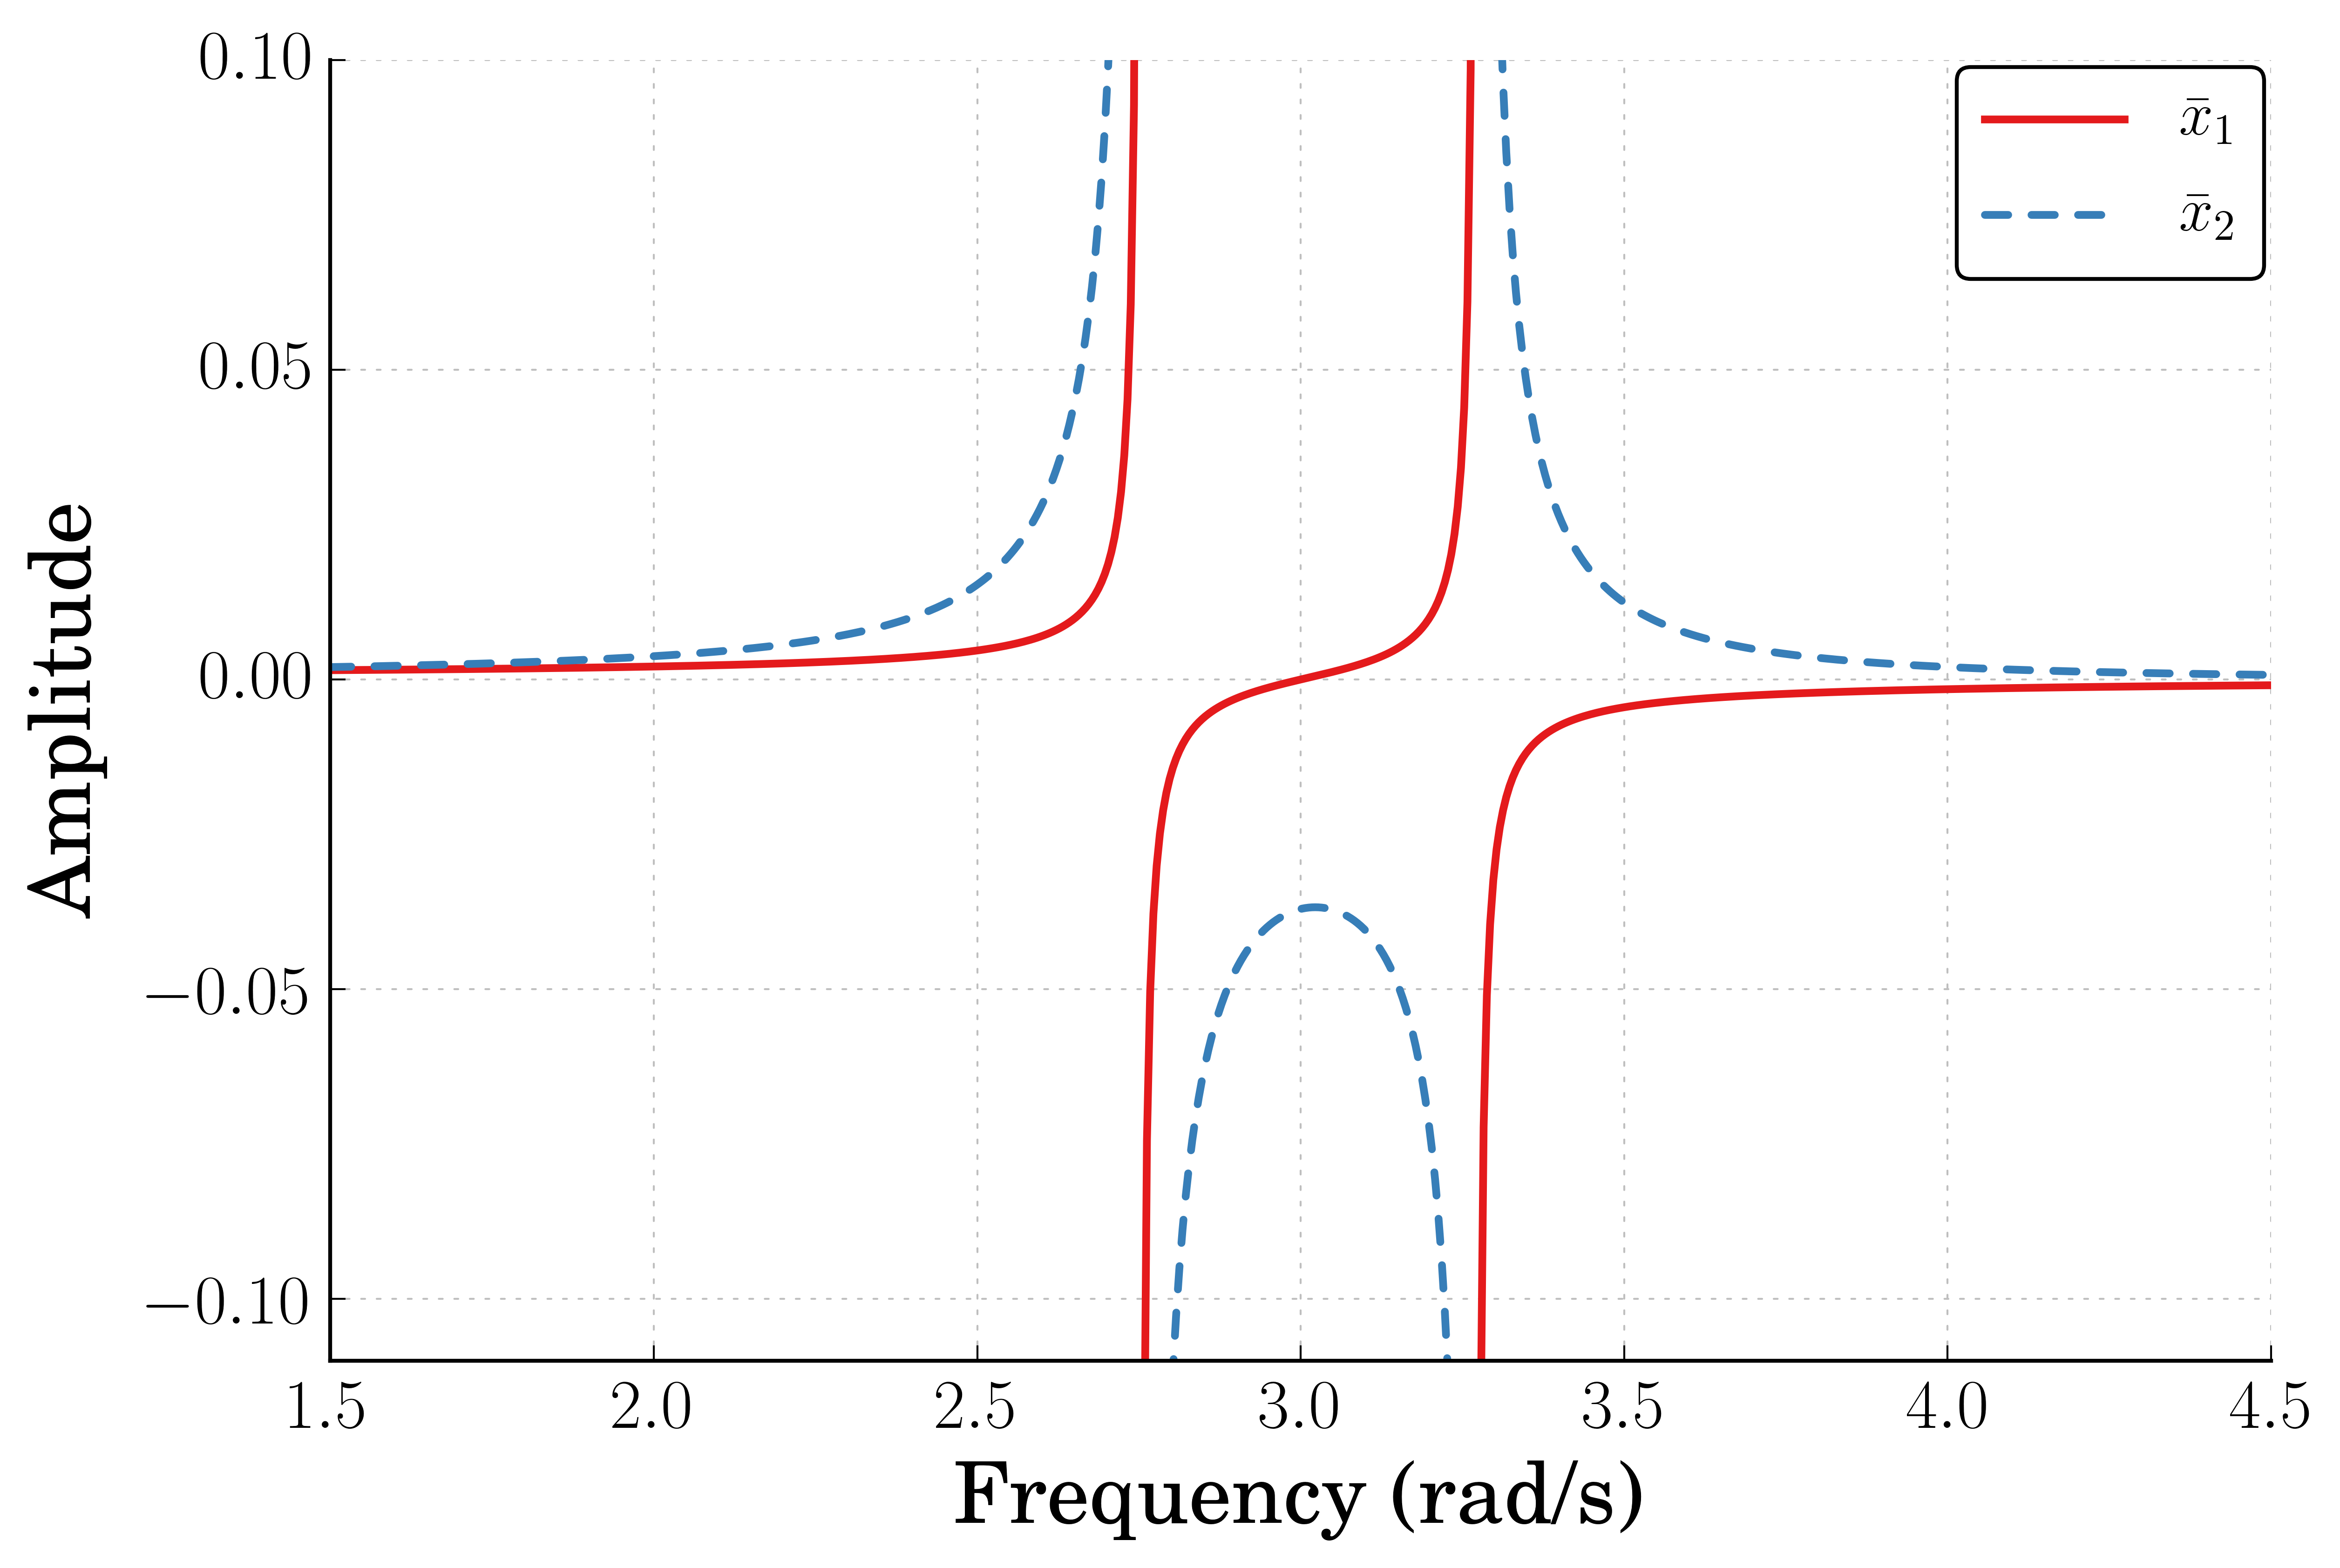

In [7]:
# Redefine the matrices with the new parameters
m1 = 100.0
m2 = 3.0

k1 = 900.0 
k2 = 27.0

M = np.asarray([[m1, 0],
                [0,  m2]])

K = np.asarray([[k1 + k2, -k2],
                [-k2,      k2]])

F1 = 1.0
F2 = 0.0

F = [F1,F2]

w = np.linspace(0,6,1200)
X = np.zeros((len(w),2))

for ii, freq in enumerate(w):
	X[ii,:] = np.dot(linalg.inv(K - freq**2 * M), F)

# Let's mask the discontinuity, so it isn't plotted
pos = np.where(np.abs(X[:,0]) >= 0.25)
X[pos,:] = np.nan
w[pos] = np.nan



# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

# Change the axis units to CMU Serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Frequency (rad/s)',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel('Amplitude',family='serif',fontsize=22,weight='bold',labelpad=10)

plt.plot(w,X[:,0],linewidth=2,label=r'$\bar{x}_1$')
plt.plot(w,X[:,1],linewidth=2,linestyle="--",label=r'$\bar{x}_2$')

# uncomment below and set limits if needed
plt.xlim(1.5,4.5)
plt.ylim(-0.11,0.10)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='serif',fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# plt.savefig('Vibration_Absorber_SmallerM2K2.pdf')

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

Notice that the two natural frequencies are closer together than the previous case. This leads to a smaller range over which there is low vibration in $x_1$. 

The amplitude of $x_2$ is also increased from the previous case.

We could again plot the magnitude of the response.

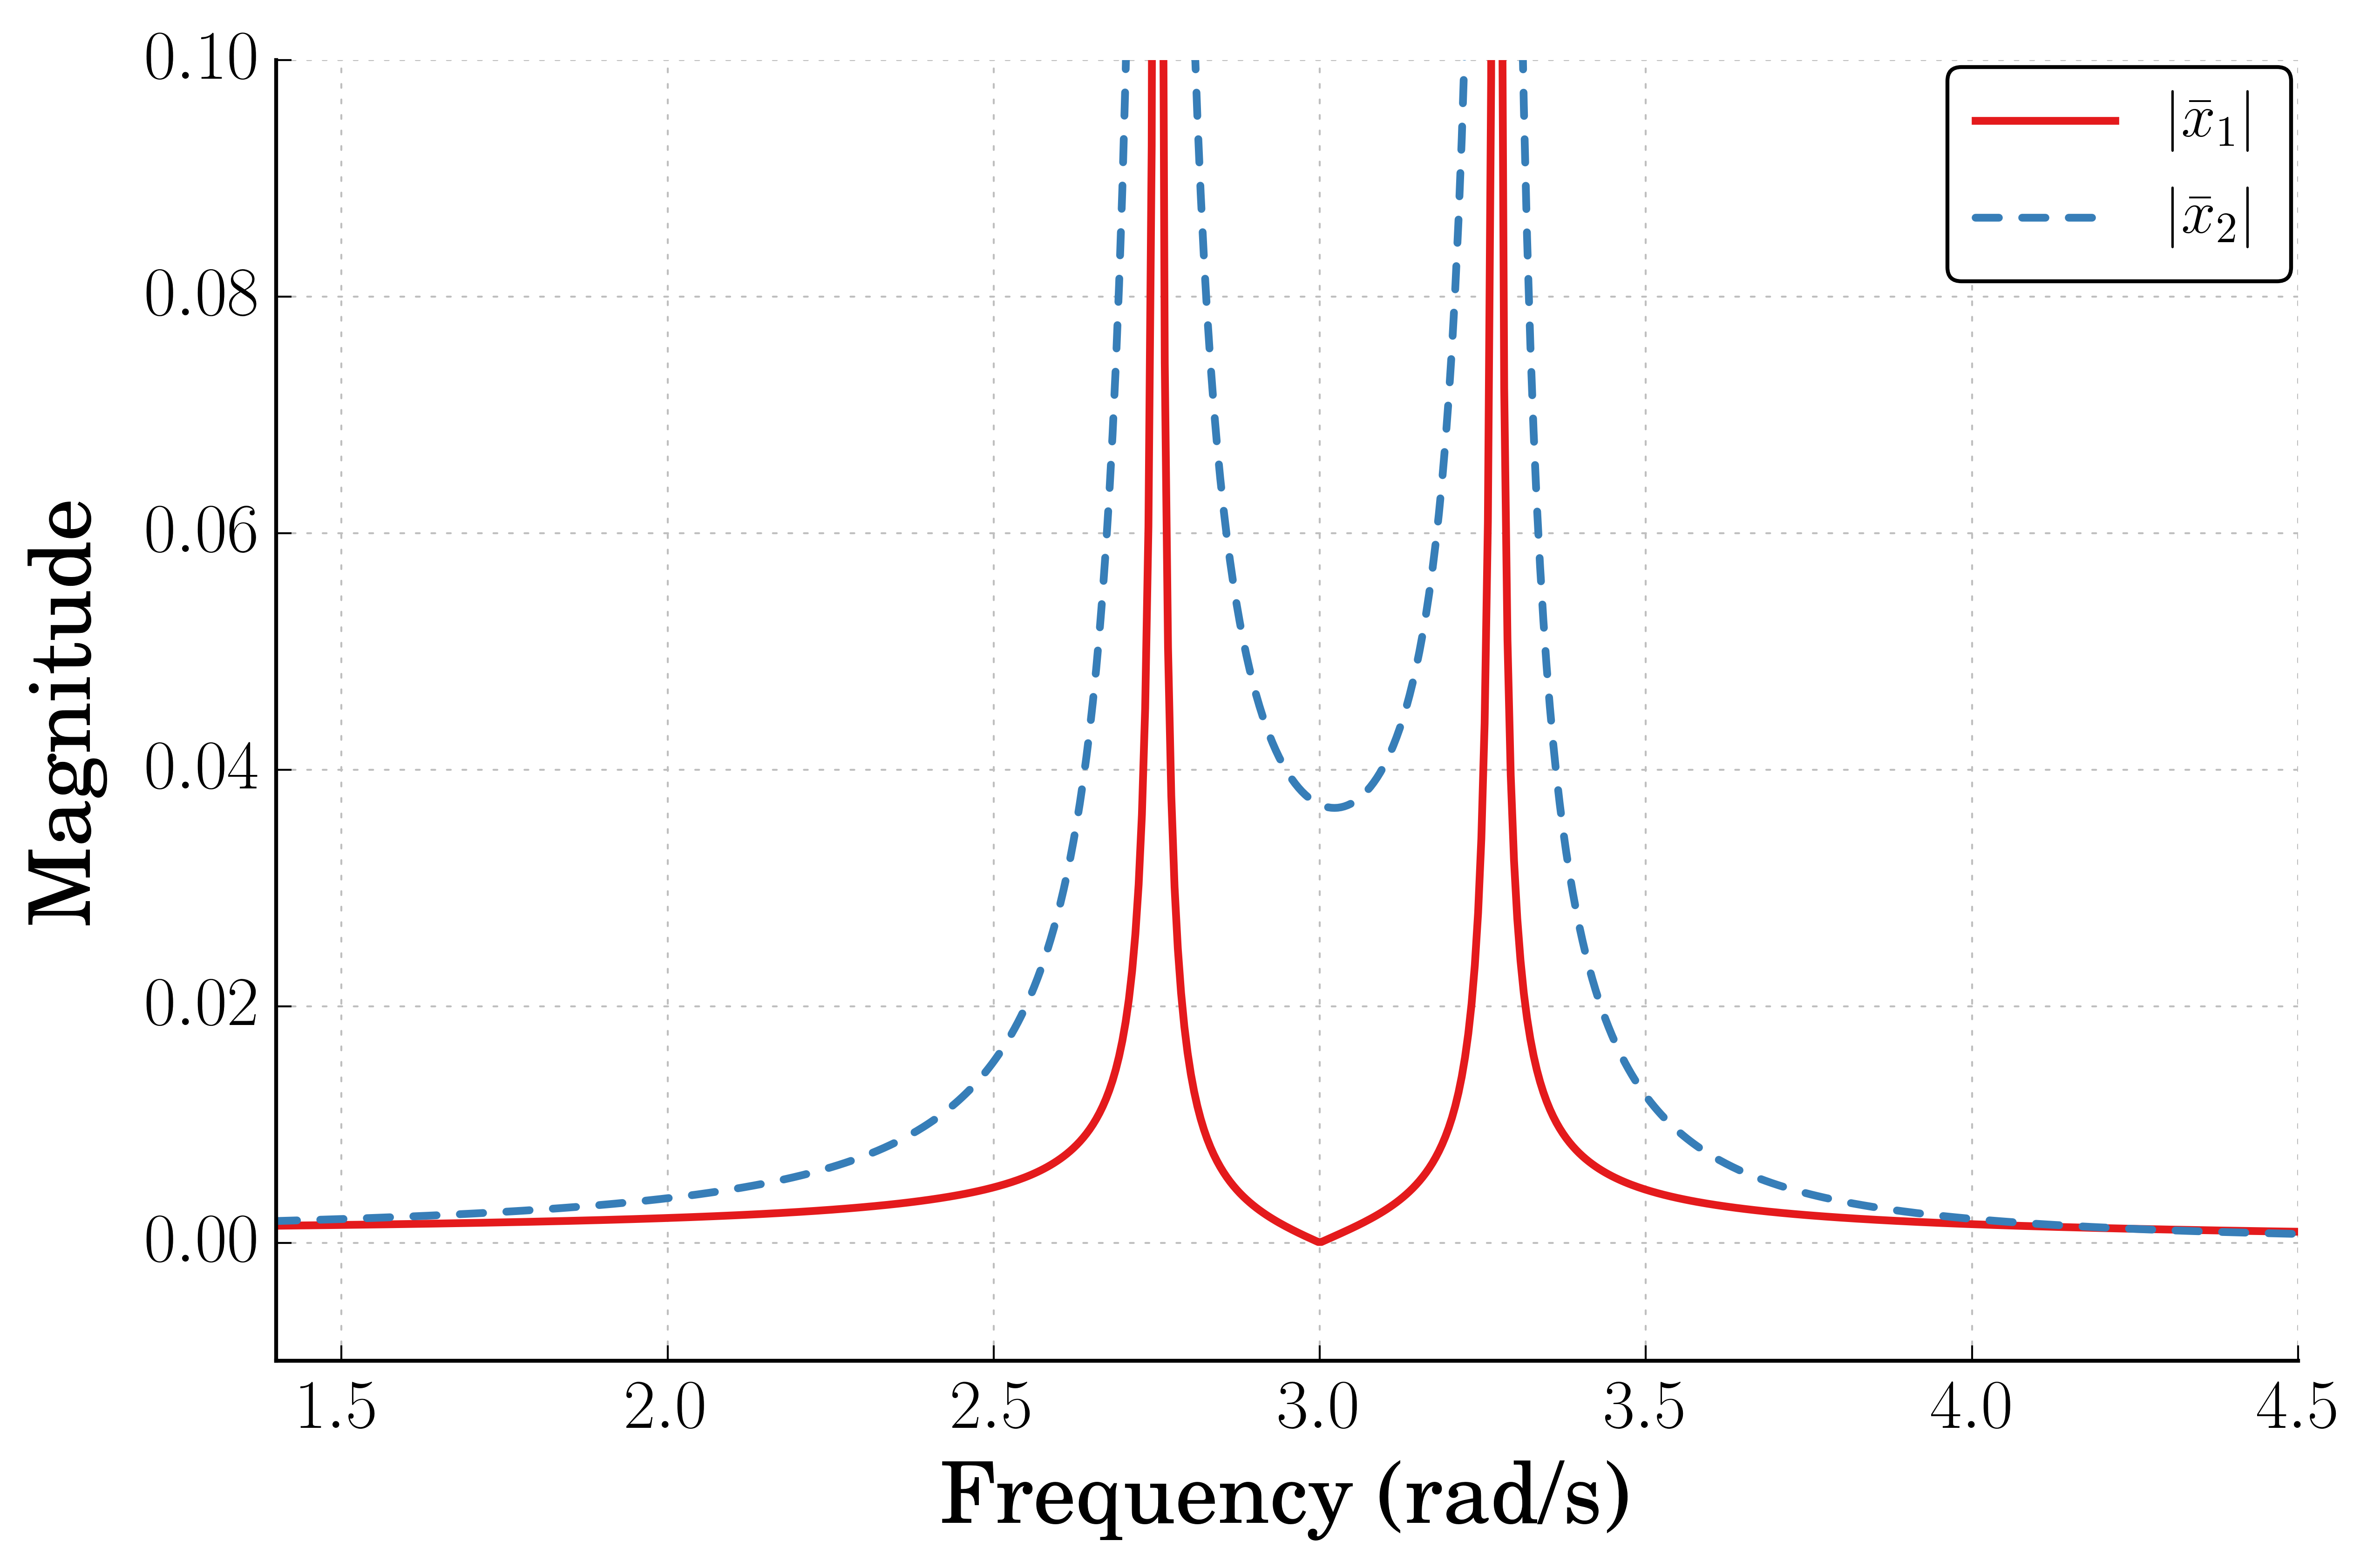

In [14]:
# Plot the magnitude of the response

# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

# Change the axis units to CMU Serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Frequency (rad/s)',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel('Magnitude',family='serif',fontsize=22,weight='bold',labelpad=10)

plt.plot(w,np.abs(X[:,0]),linewidth=2,label=r'$|\bar{x}_1|$')
plt.plot(w,np.abs(X[:,1]),linewidth=2,linestyle="--",label=r'$|\bar{x}_2|$')

# uncomment below and set limits if needed
plt.xlim(1.4,4.5)
plt.ylim(-0.01,0.1)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='serif',fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# plt.savefig('Vibration_Absorber_Magnitude.pdf')

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

## Time Response
Let's take a look at the time response to confirm this phenomenon. To do so, we'll have to represent our equations of motion as a system of first order ODEs, rather than two second-order ODEs. This is the beginning of putting the equations into state space form.

Define a state vector $\mathbf{w} = \left[x \quad \dot{x_1} \quad x_2 \quad \dot{x_2}\right]^T $

*Note*: We'll most often see the state space form writen as:

$ \quad \dot{w} = Aw + Bu $

where $x$ is the state vector, $A$ is the state transition matrix, $B$ is the input matrix, and $u$ is the input. We'll use w here and in the code to avoid confusion with our state $x$, the position of $m_1$.

To begin, let's write the two equations of motion as:

$ \quad \ddot{x}_1 = \frac{1}{m_1} \left(-(k_1 + k_2)x_1 + k_2 x_2 + f \right)$

$ \quad \ddot{x}_2 = \frac{1}{m_2} \left(k_2 x_1 - k_2 x_2 \right)$

After some algebra and using the state vector defined above, we can write our equations of motion as:

$ \quad \dot{\mathbf{w}} = \begin{bmatrix}0 & 1 & 0 & 0\\ -\frac{k_1 + k_2}{m_1} & 0 & \frac{k_2}{m_1} & 0 \\ 0 & 0 & 0 & 1 \\ \frac{k_2}{m_2} & 0 & -\frac{k_2}{m_2} & 0 \end{bmatrix}\mathbf{w} + \begin{bmatrix}0 \\ \frac{1}{m_1} \\ 0 \\ 0 \end{bmatrix} f $

Now, let's write this in a way that our ODE solver can use it.

In [9]:
# Define the equations of motion

# Define the system as a series of 1st order ODEs (beginnings of state-space form)
def eq_of_motion(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1, x1_dot, x2, x2_dot]
        t :  time
        p :  vector of the parameters:
                  p = [m1, m2, k1, k2, wf]
    """
    
    x1, x1_dot, x2, x2_dot = w
    m1, m2, k1, k2, wf = p

    # Create sysODE = (x1', x1_dot', x2', x2_dot')
    sysODE = [x1_dot,
             (-(k1 + k2) * x1 + k2 * x2 + f(t, p)) / m1,
             x2_dot,
             (k2 * x1 - k2 * x2) / m2]
    
    return sysODE


# Define the forcing function
def f(t, p):
    """ 
    Defines the forcing function
    
    Arguments:
        t : time
        p :  vector of the parameters:
             p = [m1, m2, k1, k2, wf]
    
    Returns:
        f : forcing function at current timestep
    """
    
    m1, m2, k1, k2, wf = p
    
    # Uncomment below for no force input - use for initial condition response
    #f = 0.0 
    
    # Uncomment below for sinusoidal forcing input at frequency wf rad/s
    f = 10 * np.sin(wf * t)
    
    return f

In [10]:
# Set up simulation parameters 

# ODE solver parameters
abserr = 1.0e-9
relerr = 1.0e-9
max_step = 0.01
stoptime = 100.0
numpoints = 10001

# Create the time samples for the output of the ODE solver
t = np.linspace(0.0, stoptime, numpoints)

# Initial conditions
x1_init = 0.0                    # initial position
x1_dot_init = 0.0                # initial velocity
x2_init = 0.0                    # initial angle
x2_dot_init = 0.0                # initial angular velocity

wf = np.sqrt(k1 / m1)             # forcing function frequency

# Pack the parameters and initial conditions into arrays 
p = [m1, m2, k1, k2, wf]
x0 = [x1_init, x1_dot_init, x2_init, x2_dot_init]

In [11]:
# Call the ODE solver.
resp = odeint(eq_of_motion, x0, t, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

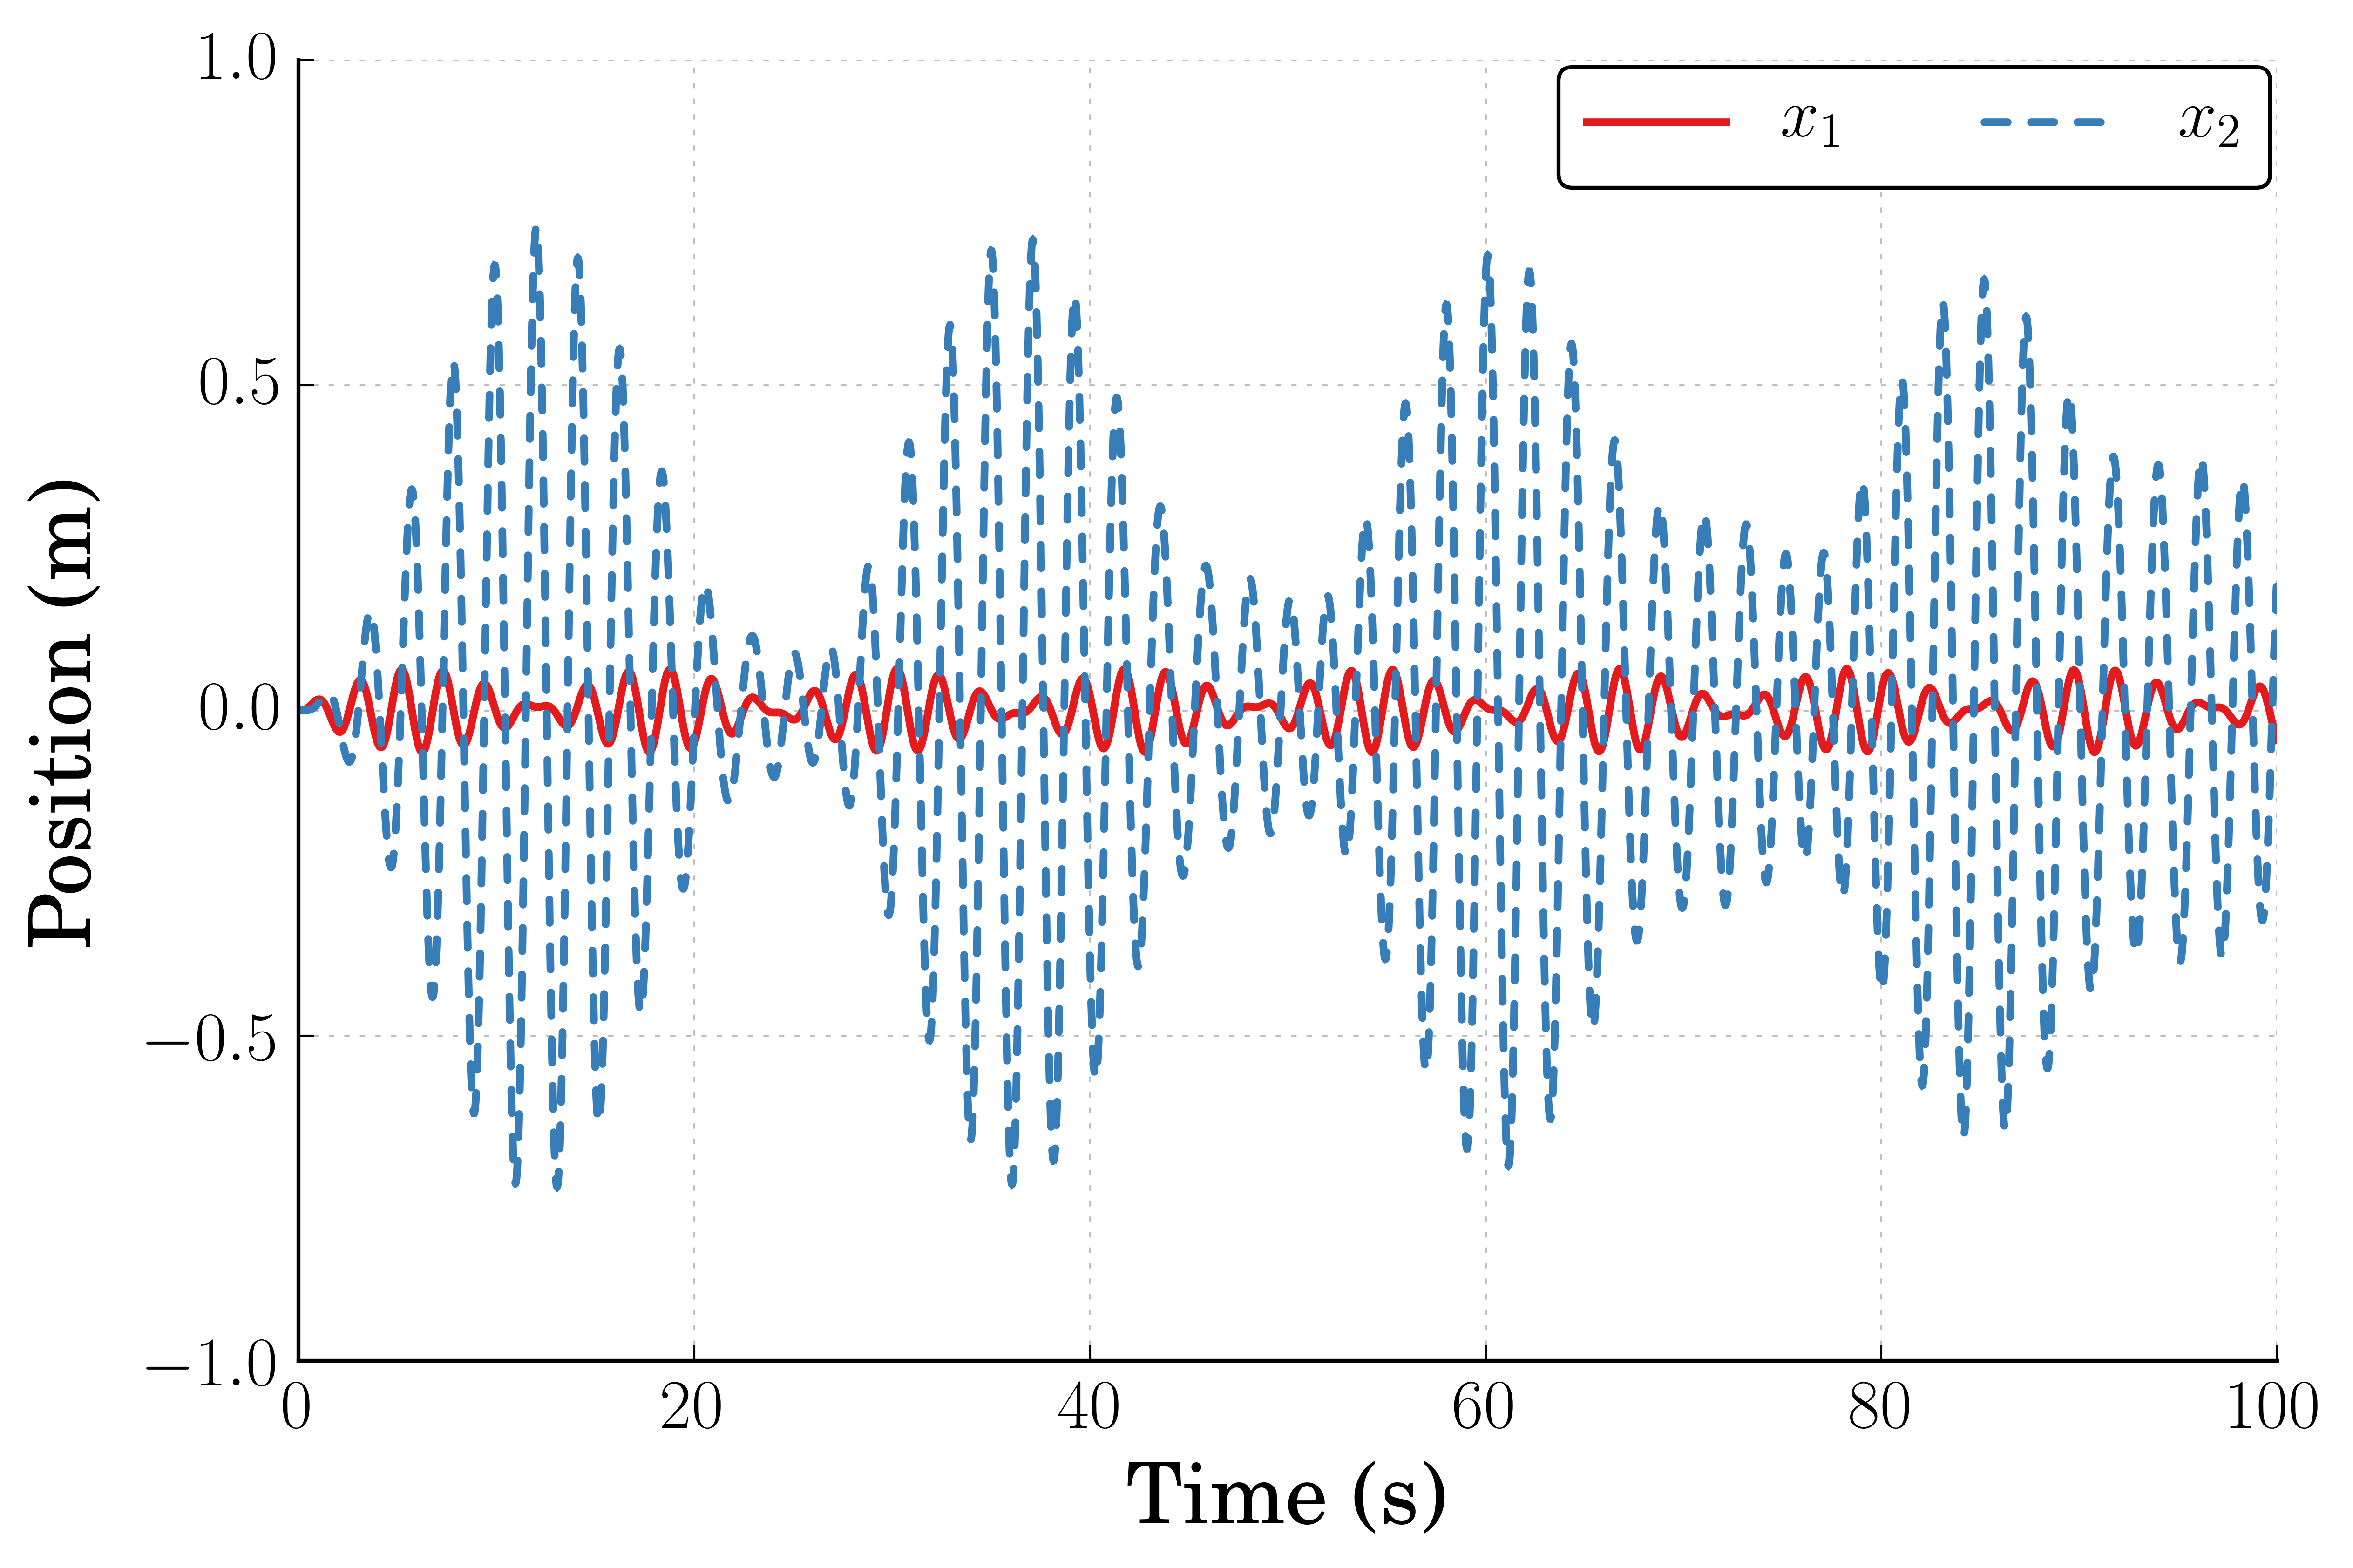

In [12]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel('Position (m)',family='serif',fontsize=22,weight='bold',labelpad=10)

plt.plot(t, resp[:,0],linewidth=2,label=r'$x_1$')
plt.plot(t, resp[:,2],linewidth=2,linestyle="--",label=r'$x_2$')

# uncomment below and set limits if needed
# plt.xlim(0,5)
plt.ylim(-1,1)


# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol=2, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='serif',fontsize=18)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('Undamped_VibAbsorber_TimeResponse.pdf')

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

## Wait... It's *NOT* a Vibration Absorber?!?!?
Remember that our frequency domain analysis assumes steady-state responses. In this simulation, that is not the case. We have some *transient* oscillation that occurs as our system transitions from rest to being forced according to $f(t)$. If the system has no damping, like this one, then this transient response never decays.

Notice, however, that the ampliude of $x(t)$ is bounded. It would not be without the attached mass, $m_2$. We're forcing at the original $m_1,k_1$ subystem's natural frequency, so it would grow to inifinity.

<hr class = "style-end">

#### Licenses
Code is licensed under a 3-clause BSD style license. See the licenses/LICENSE.md file.

Other content is provided under a [Creative Commons Attribution-NonCommercial 4.0 International License](http://creativecommons.org/licenses/by-nc/4.0/), CC-BY-NC 4.0.

In [13]:
# Ignore this cell - We just update the CSS to make the notebook look a little bit better and easier to read

# Improve the notebook styling -- Run this first
from IPython.core.display import HTML
css_file = 'styling/CRAWLAB_IPythonNotebook.css'
HTML(open(css_file, "r").read())